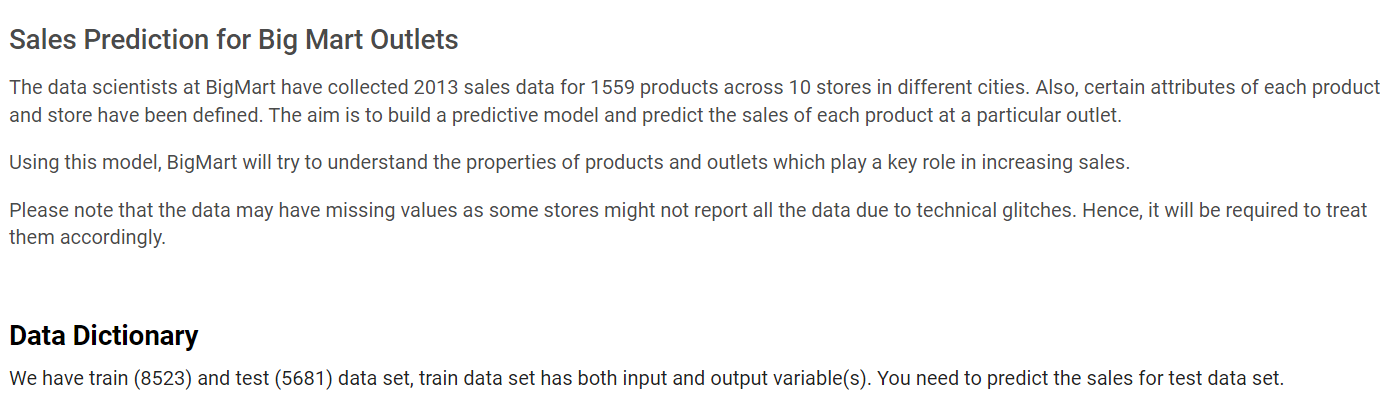

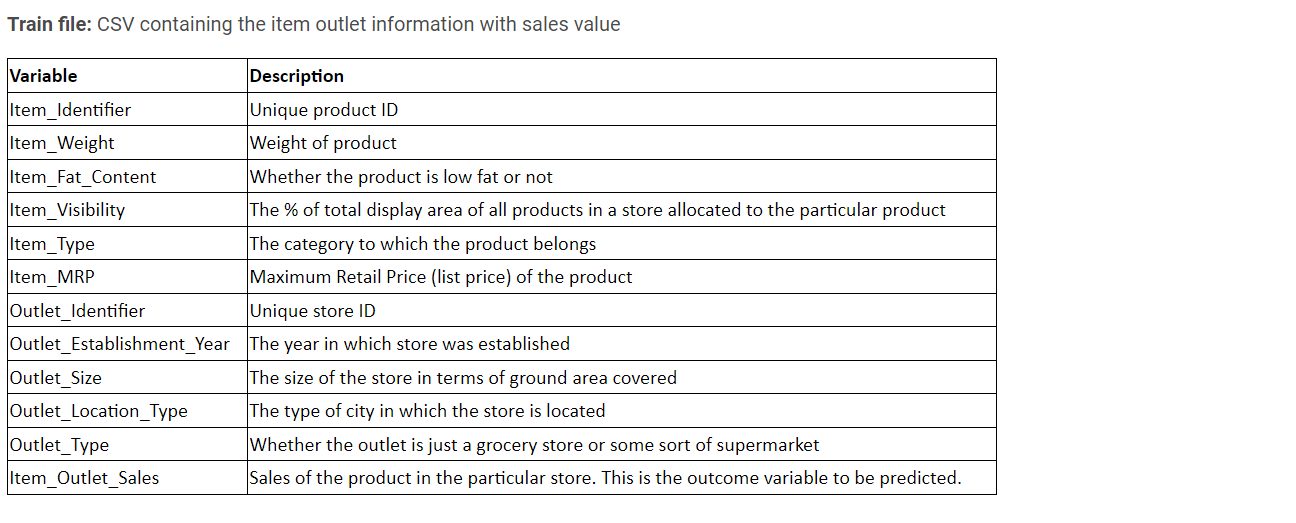

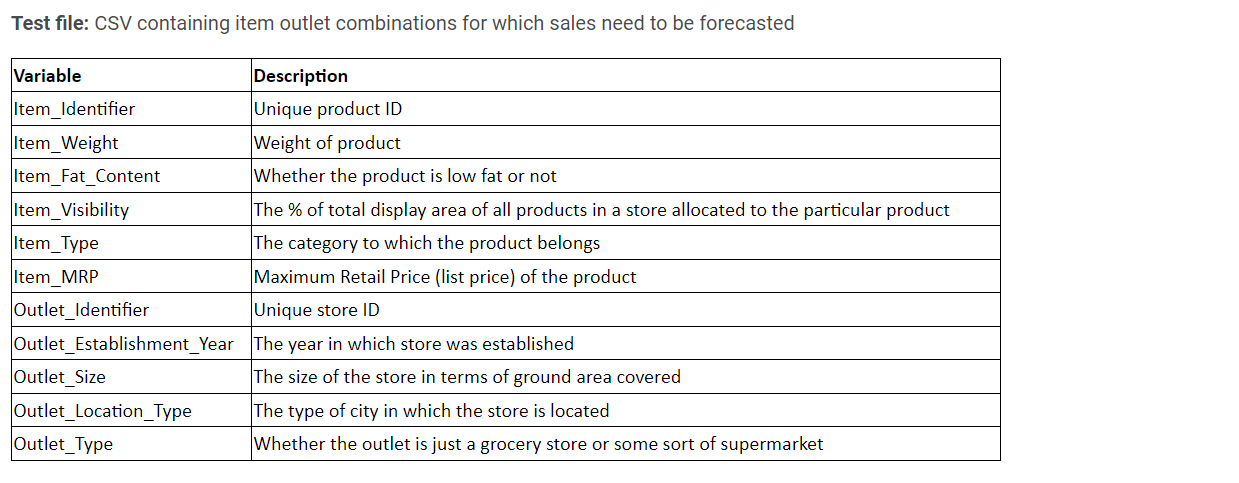

### Importing the necessary libraries

In [2]:
import pandas as pd      
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Loading the Dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Checking the datatypes of each features

In [5]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Now will check for duplicated values

In [6]:
train[train.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Now will concat Train and Test data to perform Data Preprocessing

In [7]:
df=pd.concat([train,test],axis=0)

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Now again we are checking for dupliates

In [9]:
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Checking the shape of the dataframe

In [10]:
df.shape

(14204, 12)

In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
for i in df.columns:
    print('Feature =',i,'\n')
    print(df[i].unique())
    print('No of unique values = ',df[i].nunique(),'\n')

Feature = Item_Identifier 

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
No of unique values =  1559 

Feature = Item_Weight 

[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1   

The data preprocessing steps to be done 

1. Item_Visibility should not be having 0 as its minimum 
2. In Item_Identifier we can take only starting 2 char and will use for prediction
3. In Item_Fat_Content we have only 2 levels but due to typoerror we have 5 levels
4. will convert Outlet_Establishment_Year to the age of the store establishment


## Will check for missing values

In [15]:
miss_val=df.isnull().sum()
miss_val[miss_val>0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

Item_Outlet_Sales has no missing values where in test data we dont have the target variable so we are getting the null counts here so we should not treat the target variable [Item_Outlet_Sales]

In [16]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


will treat the missing values 

will fill the Item_Weight based on the mean by grouping with the Item_Identifier so that the treatement of missing values will be more efficient


### For example it works like this

In [17]:
df.Item_Identifier.value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [20]:
df[df.Item_Identifier=='FDU15']['Item_Weight'].mean()

13.650000000000002

In [27]:
# For example will use FDU15 item how the weight are filled
df[df.Item_Identifier=='FDU15'][['Item_Identifier','Item_Weight']]

,Item_Identifier,Item_Weight
1038,FDU15,13.65
2407,FDU15,13.65
3162,FDU15,13.65
4487,FDU15,13.65
7636,FDU15,13.65
7646,FDU15,13.65
1147,FDU15,13.65
1497,FDU15,13.65
2798,FDU15,NaN
3298,FDU15,NaN


In [24]:
df[df.Item_Identifier=='FDU15'][['Item_Identifier','Item_Weight']].mean()

Item_Weight    13.65
dtype: float64

In [25]:
grouped_Item_Weight=df.pivot_table(values='Item_Weight',index='Item_Identifier')
grouped_Item_Weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [28]:
grouped_Item_Weight.loc['FDU15',:]

Item_Weight    13.65
Name: FDU15, dtype: float64

In [29]:
# now will find the missing data in the Item_Weight column

miss_idx=df[df['Item_Weight'].isnull()].index
miss_idx

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            5627, 5634, 5640, 5643, 5648, 5655, 5656, 5661, 5665, 5669],
           dtype='int64', length=2439)

In [38]:
for i,item in enumerate(df.Item_Identifier):
    if i in miss_idx:
        if item in grouped_Item_Weight.index:
            df['Item_Weight'][i]=grouped_Item_Weight.loc[item]['Item_Weight']


In [30]:
df.Item_Identifier

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
5676    FDB58
5677    FDD47
5678    NCO17
5679    FDJ26
5680    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

In [39]:
df['Item_Weight'].isnull().sum()

0

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [42]:
# now will impute the missing values which are present in the Outlet_Size by taking the mode because its a categorical variable

grouped_Outlet_Size=df.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x:x.mode()))
grouped_Outlet_Size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [44]:
miss_idx_Outlet_Size=df[df['Outlet_Size'].isnull()].index
miss_idx_Outlet_Size

Int64Index([   3,    8,    9,   25,   28,   30,   33,   45,   46,   47,
            ...
            5647, 5649, 5650, 5652, 5662, 5668, 5670, 5678, 5679, 5680],
           dtype='int64', length=4016)

In [46]:
for i,item in enumerate(df.Outlet_Type):
    if i in miss_idx_Outlet_Size:
        if item in grouped_Outlet_Size.index:
            df['Outlet_Size'][i]=grouped_Outlet_Size.loc[item]['Outlet_Size']

In [47]:
df['Outlet_Size'].isnull().sum()

0

In [48]:
df1=df.copy(deep=True)

In [49]:
df=df.reset_index(drop=True)

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Now will modify item visibility because we cannot have 0 in item visibility

In [52]:
# Now we are going to impute the 0 values in Item_Visibility with the mean of it 

mean_Item_Visibility=round(df['Item_Visibility'].mean(),6)
mean_Item_Visibility

0.065953

In [51]:
idx=df[df['Item_Visibility']==0].index
idx

Int64Index([    3,     4,     5,    10,    32,    33,    46,    60,    72,
               79,
            ...
            14120, 14126, 14134, 14137, 14158, 14166, 14171, 14177, 14184,
            14202],
           dtype='int64', length=879)

In [53]:
# Now will try to replace with mean of item_visibility where ever you can find item_visibility = 0
df['Item_Visibility'] = df.Item_Visibility.apply(lambda x : mean_Item_Visibility if x == 0 else x)

In [54]:
df[df['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Will work on the typo error in the Item_Fat_Content


In [56]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [57]:
# Now will replace the data accourdingly

df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [58]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Now will take only 2 char from the Item_Identifier


In [59]:
df['New_Item_Identifier']=df['Item_Identifier'].apply(lambda x : x[0:2])

In [62]:
df['New_Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_Identifier, dtype: int64

In [63]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [64]:
# Now will replace the data where ever we having the NC in the New_Item_Identifier the Item_Fat_Content should be others

df.loc[df['New_Item_Identifier']=='NC','Item_Fat_Content']='others'

In [65]:
df['Item_Fat_Content'].value_counts()

Low Fat    6499
Regular    5019
others     2686
Name: Item_Fat_Content, dtype: int64

In [68]:
# We have collected the data from year 2013 so we are subtracting outlet Estiablishment year with 2013
df['age_of_store']=2013-df.Outlet_Establishment_Year

In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,others,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [70]:
df2=df.copy(deep=True)

### Now will drop those features where we have performed data preprocessing technique and now those columns are not useful for prediction

In [71]:
df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [72]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.065953,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


-----------------------------------------------------------------------------------------------------------------------

### In machine learning, encoding techniques are used to convert categorical variables, such as text labels, into numerical values, that can be used as input for a model because most of Machine learning model cannot understand text labels 

Type of Encoding Techniques

There are Mainly 2 type of Encoding Technique
1. Nominal Encoding (Numerical Categorical variable)
2. Ordinal Encoding (Ordinal Categorical variable)

#### Some Popular Encoding Techniques includes for Nominal Encoding is One-Hot-Encoding(OHE) and for Ordinal Encoding is Label Encoding

In [73]:
new_df=pd.get_dummies(columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Identifier'],data=df,drop_first=True)

In [75]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.065953,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [74]:
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,Dairy,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,Soft Drinks,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,Meat,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,Fruits and Vegetables,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,Household,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


In [78]:
new_df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

### Both pd.get_dummies and OHE works the same (but get  dummies is from pandas and OHE is from sklearn)

In [79]:
# If you ant to use OHE then you want to import libraries

from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()
new_df['Item_Type'] = le.fit_transform(new_df['Item_Type'])

In [81]:
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,0,1,0,0,1,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1
